In [1]:
import scipy.stats as st
import statsmodels.datasets 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Uploade an already excisting dataset from statsmodels.datasets
dataf = statsmodels.datasets.cancer.load_pandas().data
dataf

,cancer,population
0,1.0,445.0
1,0.0,559.0
2,3.0,677.0
3,4.0,681.0
4,3.0,746.0
...,...,...
296,250.0,62931.0
297,267.0,63476.0
298,244.0,66676.0
299,248.0,74005.0


In [4]:
print(statsmodels.datasets.cancer.NOTE)

::

    Number of observations: 301
    Number of variables: 2
    Variable name definitions:

        cancer - The number of breast cancer observances
        population - The population of the county




In [12]:
cancer = dataf.cancer

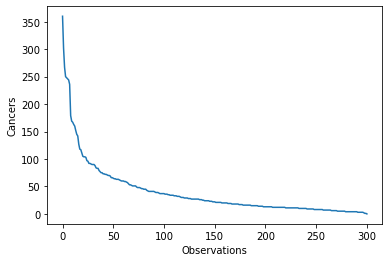

In [14]:
plt.plot(sorted(cancer)[::-1]) #sort number of cases in accending order
plt.xlabel('Observations')
plt.ylabel('Cancers')
plt.show()

Text(0, 0.5, 'Frequency of Observations')

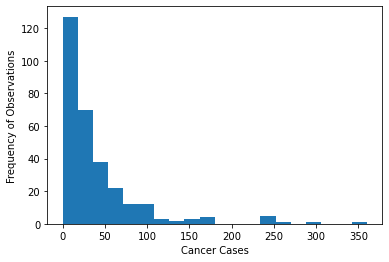

In [16]:
# Do the same thing with a HISTOGRAM
plt.hist(dataf['cancer'],bins=20);
plt.xlabel('Cancer Cases')
plt.ylabel('Frequency of Observations')

Text(0, 0.5, 'Frequency of Observations')

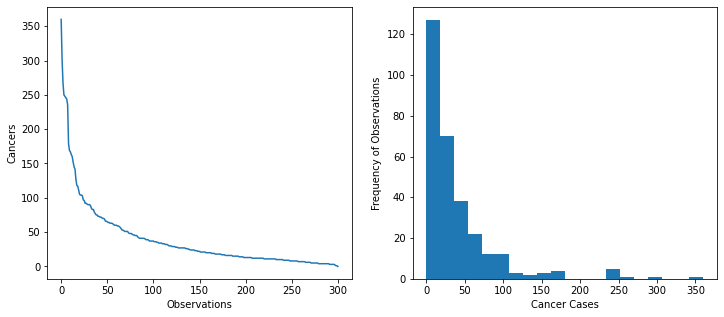

In [18]:
# Here i can put them together side by side
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(sorted(cancer)[::-1])
ax1.set_xlabel('Observations')
ax1.set_ylabel('Cancers')

ax2.hist(cancer, bins=20)
ax2.set_xlabel('Cancer Cases')
ax2.set_ylabel('Frequency of Observations')

### The Maximum Likelihood algorithms to estimate the value of λ that  maximizes teh propability of observing data in an exponential  data distribution. Effectively this can be shown to be the inverse of the mean of the data in the exponential distribution

In [19]:
#The mean for the number of cancer observations is According to this model,
# S (number of days of survival) is an exponential random variable with the parameter Λ
# and the observations si are sampled on this distribution
#    C_mean = 1/n * Σci

C_mean = cancer.mean()
lambda_parameter = 1. / C_mean

#### Lets now compare this exponential this exponential distribution to the actual data. But first we will have to use the numpy method linspace to scale the exponential function we are trying to fit to the scale of the actual data. Linspace takes a start point(0), a stiop point(C_max), and the number of separations along the axis(301)

In [24]:
C_max = cancer.max() #m maximum number of cancer cases in a histogram bin
cancer_cases = np.linspace(0., C_max, 301)

### Lets now find the propability density function of this distribution by passing the pdf method the observations we set up above and then passing it the scale of the inverse of the labda parameter

In [25]:
expo_dist = st.expon.pdf(cancer_cases, scale= 1. / lambda_parameter)

Text(0, 0.5, 'Frequency of Observations')

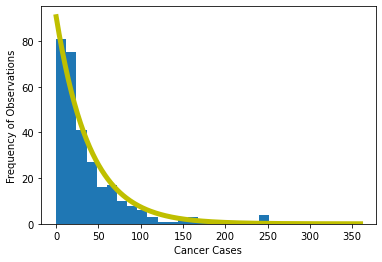

In [28]:
fig, ax = plt.subplots(1, 1, figsize= (6,4)) #doing this allows  us to plot graphs on top of each other
ax.hist(cancer, bins = 30) #plot the histogram and then in hte next line plot the exponentialdist over the top
ax.plot(cancer_cases, expo_dist * len(cancer) * C_max / 30, '-y', lw=5) #-y=yellow, lw= line width
ax.set_xlabel('Cancer Cases')
ax.set_ylabel('Frequency of Observations')

### This looks like quite a good fit but we really need a measure of how good our maximum likelihood estimation was. In order to do that we can get some measurement parameters by using a different SciPy method that also calculates teh best exponential fit

In [29]:
expo_dist = st.expon
arguments = expo_dist.fit(cancer)
arguments

(0.0, 39.857142857142854)

### The above fit method, when passed the cancer cases column from the data frame, will return some arguments we which can then pass to the Kolmogorov- Smirnow test. This will test how well our chosen distribution type fits the actual data.

In [30]:
st.kstest(cancer, expo_dist.cdf, arguments)

KstestResult(statistic=0.08878213963828058, pvalue=0.016307682030042146)

### When we use the KStest we usually set up a null hypothesis that states that the fitted distribution is a 'good-fit' but here we see that the p-value is below 0.05 and therefore we have to reject the hypothesis for a 95% confidence interval. The exponential distribution is not a good fit our data even though it looks as if it is

In [32]:
# We can try now another distribution type that is used to calculate the lifetime of components before failure.
fLife_dist = st.fatiguelife
arg = fLife_dist.fit(cancer)
st.kstest(cancer, fLife_dist.cdf, arg)

KstestResult(statistic=0.0490929303676384, pvalue=0.44850612100977694)

### The p-value here is above 0.05 so we can accept the null hypothesis that this distribution is a good fit. We can plot it below and compare to the exponential distribution as well

Text(0, 0.5, 'Observations')

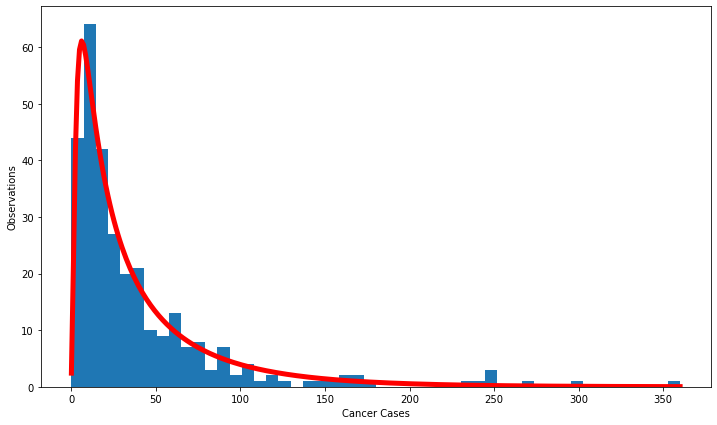

In [35]:
fatLife_dist = fLife_dist.pdf(cancer_cases, *arg)

fig, ax = plt.subplots(1,1, figsize = (12,7))
ax.hist(cancer, bins =50)
ax.plot(cancer_cases, fatLife_dist*len(cancer)*C_max / 50, '-r', lw=5, label='FLife')
ax.set_xlabel('Cancer Cases')
ax.set_ylabel('Observations')

### We can try and fit a notmal distribution to this as well just to see what happens

In [42]:
dist_norm = st.norm.pdf(cancer_cases, scale= 1. / lambda_parameter)

Text(0, 0.5, 'Observations')

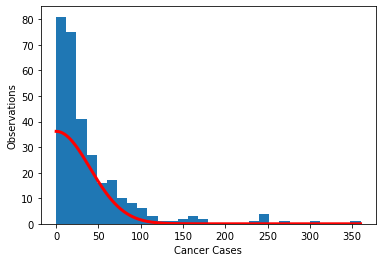

In [43]:
fig, ax = plt.subplots(1,1, figsize = (6,4))
ax.hist(cancer, bins=30)
ax.plot(cancer_cases, dist_norm* len(cancer)*C_max /30, '-r', lw=3)
ax.set_xlabel('Cancer Cases')
ax.set_ylabel('Observations')

In [44]:
dist = st.norm
args = dist.fit(cancer)
args

(39.857142857142854, 50.89304977523723)

In [45]:
st.kstest(cancer,  dist.cdf, args)

KstestResult(statistic=0.22118005333948185, pvalue=2.0553181733516252e-13)

### Now lets try to set of numbers that might be more like a normal distribution

In [50]:
import pandas as pd

list = [1,4,5,7,8,8,9,11,5,2,1,3,5,4,8,9]

# Calling DataFrame constructor on list

df = pd.DataFrame(list, columns = ['numbers'])
df.head()

,numbers
0,1
1,4
2,5
3,7
4,8


In [51]:
numbers = df.numbers

(array([2., 0., 1., 0., 1., 0., 2., 0., 3., 0., 0., 0., 1., 0., 3., 0., 2.,
        0., 0., 1.]),
 array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
         6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ]),
 <a list of 20 Patch objects>)

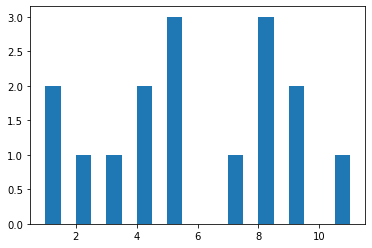

In [52]:
plt.hist(df['numbers'], bins=20)


In [53]:
dist = st.norm
args = dist.fit(numbers)
args


(5.625, 2.9553976043842223)

In [55]:
st.kstest(numbers, dist.cdf, args)

KstestResult(statistic=0.16419014085235528, pvalue=0.7222869229838124)